In [1]:
import os

# DWD proxy
os.environ["HTTP_PROXY"]  = "http://ofsquid.dwd.de:8080"
os.environ["HTTPS_PROXY"] = "http://ofsquid.dwd.de:8080"

# Optional but recommended
os.environ["http_proxy"]  = os.environ["HTTP_PROXY"]
os.environ["https_proxy"] = os.environ["HTTPS_PROXY"]

In [2]:
import importlib
import dawid_graph as dawid

importlib.reload(dawid)

✅ OpenAI key loaded.
✅ OpenAI key loaded.


<module 'dawid_graph' from '/Users/rpotthas/all/e-ai_ml2/course/code/code10/dawid_graph.py'>

<div style='color:gray; font-style:italic; margin-left:2cm'>extract_forecast_datetime: 2026-01-01 16</div>

<div style='color:gray; font-style:italic; margin-left:2cm'>get_latest_forecast_reference_time: 2025-12-31 00</div>

<div style='color:gray; font-style:italic; margin-left:2cm'>calculate_forecast_lead_time: 40.0</div>

<div style='color:gray; font-style:italic; margin-left:2cm'>extract_location: Location: Not specified</div>

<div style='color:gray; font-style:italic; margin-left:2cm'>extract_variable: Temperature</div>

<div style='color:gray; font-style:italic; margin-left:2cm'>Downloading: https://opendata.dwd.de/weather/nwp/icon-eu/grib/00/t_2m/icon-eu_europe_regular-lat-lon_single-level_2025123100_040_T_2M.grib2.bz2</div>

<div style='color:gray; font-style:italic; margin-left:2cm'>Plot saved as temperature_forecast.png</div>

I've created and displayed the temperature forecast for Monday at 4 PM. If you have a specific location in mind, feel free to let me know for more detailed information!

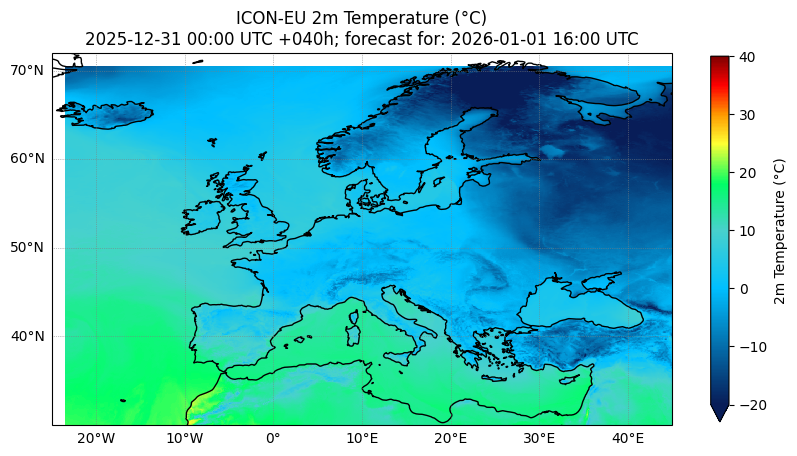

In [3]:
dawid.ai("Please give me the temperature forecast for Monday 4pm.")

In [4]:
# Call the function to list functions with their docstrings in dawid2
functions_metadata = dawid.list_functions()

# Prepare the Markdown formatted output
markdown_output = "# List of Functions in dawid2\n\n"

for func_name, doc in functions_metadata:
    markdown_output += f"## {func_name}\n"
    markdown_output += f"**Description:**\n{doc}\n\n"
    markdown_output += "---\n"

# Display the formatted Markdown
from IPython.display import Markdown, display
display(Markdown(markdown_output))


# List of Functions in dawid2

## TypedDict
**Description:**
A simple typed namespace. At runtime it is equivalent to a plain dict.

TypedDict creates a dictionary type such that a type checker will expect all
instances to have a certain set of keys, where each key is
associated with a value of a consistent type. This expectation
is not checked at runtime.

Usage::

    >>> class Point2D(TypedDict):
    ...     x: int
    ...     y: int
    ...     label: str
    ...
    >>> a: Point2D = {'x': 1, 'y': 2, 'label': 'good'}  # OK
    >>> b: Point2D = {'z': 3, 'label': 'bad'}           # Fails type check
    >>> Point2D(x=1, y=2, label='first') == dict(x=1, y=2, label='first')
    True

The type info can be accessed via the Point2D.__annotations__ dict, and
the Point2D.__required_keys__ and Point2D.__optional_keys__ frozensets.
TypedDict supports an additional equivalent form::

    Point2D = TypedDict('Point2D', {'x': int, 'y': int, 'label': str})

By default, all keys must be present in a TypedDict. It is possible
to override this by specifying totality::

    class Point2D(TypedDict, total=False):
        x: int
        y: int

This means that a Point2D TypedDict can have any of the keys omitted. A type
checker is only expected to support a literal False or True as the value of
the total argument. True is the default, and makes all items defined in the
class body be required.

The Required and NotRequired special forms can also be used to mark
individual keys as being required or not required::

    class Point2D(TypedDict):
        x: int               # the "x" key must always be present (Required is the default)
        y: NotRequired[int]  # the "y" key can be omitted

See PEP 655 for more details on Required and NotRequired.

---
## ai
**Description:**
No description available.

---
## calculate_forecast_lead_time
**Description:**
Calculates the forecast lead time in hours from the forecast reference time to the requested forecast time.
Forecast time must be within 120 hours of the reference time.

:param forecast_datetime: A string representing the forecast datetime (in "YYYY-MM-DD HH" format).
:param reference_datetime: A string representing the reference datetime when the forecast was made.
:return: The lead time in hours (integer).
:raises ValueError: If the forecast datetime is more than 120 hours ahead of the reference time.

---
## calculate_lead_time_node
**Description:**
No description available.

---
## debug_message
**Description:**
No description available.

---
## display
**Description:**
Display a Python object in all frontends.

By default all representations will be computed and sent to the frontends.
Frontends can decide which representation is used and how.

In terminal IPython this will be similar to using :func:`print`, for use in richer
frontends see Jupyter notebook examples with rich display logic.

Parameters
----------
*objs : object
    The Python objects to display.
raw : bool, optional
    Are the objects to be displayed already mimetype-keyed dicts of raw display data,
    or Python objects that need to be formatted before display? [default: False]
include : list, tuple or set, optional
    A list of format type strings (MIME types) to include in the
    format data dict. If this is set *only* the format types included
    in this list will be computed.
exclude : list, tuple or set, optional
    A list of format type strings (MIME types) to exclude in the format
    data dict. If this is set all format types will be computed,
    except for those included in this argument.
metadata : dict, optional
    A dictionary of metadata to associate with the output.
    mime-type keys in this dictionary will be associated with the individual
    representation formats, if they exist.
transient : dict, optional
    A dictionary of transient data to associate with the output.
    Data in this dict should not be persisted to files (e.g. notebooks).
display_id : str, bool optional
    Set an id for the display.
    This id can be used for updating this display area later via update_display.
    If given as `True`, generate a new `display_id`
clear : bool, optional
    Should the output area be cleared before displaying anything? If True,
    this will wait for additional output before clearing. [default: False]
**kwargs : additional keyword-args, optional
    Additional keyword-arguments are passed through to the display publisher.

Returns
-------
handle: DisplayHandle
    Returns a handle on updatable displays for use with :func:`update_display`,
    if `display_id` is given. Returns :py:data:`None` if no `display_id` is given
    (default).

Examples
--------
>>> class Json(object):
...     def __init__(self, json):
...         self.json = json
...     def _repr_pretty_(self, pp, cycle):
...         import json
...         pp.text(json.dumps(self.json, indent=2))
...     def __repr__(self):
...         return str(self.json)
...

>>> d = Json({1:2, 3: {4:5}})

>>> print(d)
{1: 2, 3: {4: 5}}

>>> display(d)
{
  "1": 2,
  "3": {
    "4": 5
  }
}

>>> def int_formatter(integer, pp, cycle):
...     pp.text('I'*integer)

>>> plain = get_ipython().display_formatter.formatters['text/plain']
>>> plain.for_type(int, int_formatter)
<function _repr_pprint at 0x...>
>>> display(7-5)
II

>>> del plain.type_printers[int]
>>> display(7-5)
2

See Also
--------
:func:`update_display`

Notes
-----
In Python, objects can declare their textual representation using the
`__repr__` method. IPython expands on this idea and allows objects to declare
other, rich representations including:

  - HTML
  - JSON
  - PNG
  - JPEG
  - SVG
  - LaTeX

A single object can declare some or all of these representations; all are
handled by IPython's display system.

The main idea of the first approach is that you have to implement special
display methods when you define your class, one for each representation you
want to use. Here is a list of the names of the special methods and the
values they must return:

  - `_repr_html_`: return raw HTML as a string, or a tuple (see below).
  - `_repr_json_`: return a JSONable dict, or a tuple (see below).
  - `_repr_jpeg_`: return raw JPEG data, or a tuple (see below).
  - `_repr_png_`: return raw PNG data, or a tuple (see below).
  - `_repr_svg_`: return raw SVG data as a string, or a tuple (see below).
  - `_repr_latex_`: return LaTeX commands in a string surrounded by "$",
                    or a tuple (see below).
  - `_repr_mimebundle_`: return a full mimebundle containing the mapping
                         from all mimetypes to data.
                         Use this for any mime-type not listed above.

The above functions may also return the object's metadata alonside the
data.  If the metadata is available, the functions will return a tuple
containing the data and metadata, in that order.  If there is no metadata
available, then the functions will return the data only.

When you are directly writing your own classes, you can adapt them for
display in IPython by following the above approach. But in practice, you
often need to work with existing classes that you can't easily modify.

You can refer to the documentation on integrating with the display system in
order to register custom formatters for already existing types
(:ref:`integrating_rich_display`).

.. versionadded:: 5.4 display available without import
.. versionadded:: 6.1 display available without import

Since IPython 5.4 and 6.1 :func:`display` is automatically made available to
the user without import. If you are using display in a document that might
be used in a pure python context or with older version of IPython, use the
following import at the top of your file::

    from IPython.display import display

---
## download_icon_2m_temperature
**Description:**
Downloads the latest ICON-EU 2m temperature GRIB2 file (forecast hour '000' by default),
decompresses it, and returns the temperature field as xarray.DataArray (in °C).

---
## download_temperature_node
**Description:**
No description available.

---
## extract_forecast_datetime
**Description:**
Use OpenAI to extract the forecast datetime from the user input, 
with the current datetime provided as context for LLM.

---
## extract_forecast_datetime_node
**Description:**
No description available.

---
## extract_location
**Description:**
Extracts the location (e.g., town, city) from the user's input using OpenAI's model.

This function communicates with the OpenAI model to identify a location mentioned in the user's input.
The model is tasked with recognizing geographical names such as cities, towns, or specific places mentioned 
in the query and returning it as a cleanly formatted string. The location is expected to be mentioned explicitly
in the user input.

Example:
If the user input is:
    "What is the weather like in Berlin tomorrow?"
The model should return:
    "Berlin"

If no location is specified, the model may return an empty string or a default value indicating the absence of 
location data.

Parameters:
user_input (str): The raw user input string from which the location needs to be extracted.

Returns:
str: The location (e.g., city, town) extracted from the input, or an empty string if no location is identified.

---
## extract_location_node
**Description:**
No description available.

---
## extract_variable
**Description:**
Extracts the weather variable (e.g., temperature, humidity, wind speed) from the user's input using OpenAI's model.

This function uses OpenAI's model to parse the user's query and identify any weather-related variables mentioned in it. 
Common variables include, but are not limited to, temperature, humidity, precipitation, wind speed, etc. The model 
will return the specific weather variable that the user is asking about. If no weather variable is explicitly mentioned, 
the model will return an empty string or a default value.

Example:
If the user input is:
    "What is the humidity in Berlin tomorrow?"
The model should return:
    "humidity"

If the user input is:
    "What is the temperature like tomorrow?"
The model should return:
    "temperature"

Parameters:
user_input (str): The raw user input string from which the weather variable needs to be extracted.

Returns:
str: The weather variable (e.g., temperature, humidity, wind speed) extracted from the input, or an empty string 
     if no weather variable is found.

---
## extract_variable_node
**Description:**
No description available.

---
## get_coordinates_from_name
**Description:**
Returns (latitude, longitude) of a place using OpenStreetMap's Nominatim service.

---
## get_coordinates_from_name_node
**Description:**
No description available.

---
## get_latest_forecast_reference_time
**Description:**
Scrapes the DWD open data server for the latest forecast reference time.

:return: The latest forecast reference time in "YYYY-MM-DD HH" format.

---
## get_latest_forecast_reference_time_node
**Description:**
No description available.

---
## interpolate_t2m
**Description:**
Interpolates the 2m temperature field at the given latitude and longitude.
Returns the interpolated temperature in °C.

---
## interpolate_temperature_node
**Description:**
No description available.

---
## list_functions
**Description:**
Lists all functions in the current module (dawid2) with their docstrings.

---
## load_dotenv
**Description:**
Parse a .env file and then load all the variables found as environment variables.

Parameters:
    dotenv_path: Absolute or relative path to .env file.
    stream: Text stream (such as `io.StringIO`) with .env content, used if
        `dotenv_path` is `None`.
    verbose: Whether to output a warning the .env file is missing.
    override: Whether to override the system environment variables with the variables
        from the `.env` file.
    encoding: Encoding to be used to read the file.
Returns:
    Bool: True if at least one environment variable is set else False

If both `dotenv_path` and `stream` are `None`, `find_dotenv()` is used to find the
.env file with it's default parameters. If you need to change the default parameters
of `find_dotenv()`, you can explicitly call `find_dotenv()` and pass the result
to this function as `dotenv_path`.

If the environment variable `PYTHON_DOTENV_DISABLED` is set to a truthy value,
.env loading is disabled.

---
## plot_t2m_EU
**Description:**
Plots 2m temperature field over Europe using a selected Cartopy projection.
Available options: "PlateCarree", "LambertConformal", "AlbersEqualArea", "Mercator"

Arguments:
- t2m: Temperature data to be plotted (xarray.DataArray)
- projection_name: The projection to use for the map (default is 'PlateCarree')
- save_plot: If True, saves the plot as an image file (default is False)

---
## plot_temperature_node
**Description:**
No description available.

---


In [5]:
import requests
from bs4 import BeautifulSoup

def list_available_files():
    base_url = "https://opendata.dwd.de/weather/nwp/icon-eu/grib/00/t_2m/"
    response = requests.get(base_url)
    
    if response.status_code != 200:
        print("Failed to fetch data from the URL.")
        return
    
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all the file links
    files = [link.get("href") for link in soup.find_all("a")]
    
    # Filter files that match the pattern for forecast data files
    forecast_files = [file for file in files if file.endswith(".grib2.bz2")]
    
    return forecast_files

# Get the list of available files
available_files = list_available_files()
if available_files:
    print("Available forecast files:")
    for file in available_files:
        print(file)
else:
    print("No forecast files found.")


Available forecast files:
icon-eu_europe_regular-lat-lon_single-level_2025123100_000_T_2M.grib2.bz2
icon-eu_europe_regular-lat-lon_single-level_2025123100_001_T_2M.grib2.bz2
icon-eu_europe_regular-lat-lon_single-level_2025123100_002_T_2M.grib2.bz2
icon-eu_europe_regular-lat-lon_single-level_2025123100_003_T_2M.grib2.bz2
icon-eu_europe_regular-lat-lon_single-level_2025123100_004_T_2M.grib2.bz2
icon-eu_europe_regular-lat-lon_single-level_2025123100_005_T_2M.grib2.bz2
icon-eu_europe_regular-lat-lon_single-level_2025123100_006_T_2M.grib2.bz2
icon-eu_europe_regular-lat-lon_single-level_2025123100_007_T_2M.grib2.bz2
icon-eu_europe_regular-lat-lon_single-level_2025123100_008_T_2M.grib2.bz2
icon-eu_europe_regular-lat-lon_single-level_2025123100_009_T_2M.grib2.bz2
icon-eu_europe_regular-lat-lon_single-level_2025123100_010_T_2M.grib2.bz2
icon-eu_europe_regular-lat-lon_single-level_2025123100_011_T_2M.grib2.bz2
icon-eu_europe_regular-lat-lon_single-level_2025123100_012_T_2M.grib2.bz2
icon-eu_euro